<a href="https://colab.research.google.com/github/lauramsromano/one_page_report/blob/main/one_page_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One Page Report 📊

O termo One Page Report está ganhando popularidade no mundo corporativo, especialmente na gestão de projetos.

Trata-se de relatórios concisos de uma página, fornecendo uma visão geral e precisa dos dados para tomadas rápidas de decisão.

Esses relatórios atuam como mapas estratégicos, utilizando gráficos e dados para facilitar a análise crítica e síntese.

Neste projeto buscamos elaborar um script que constroi report para diferentes meses e diferentes unidades de um negócio, a fim de sintetizar e facilitar o acesso das informações para os colaboradores.

---

Foram utilizados dados randômicos para simular dois tipos de report:

- análise mensal de indicadores de satisfação de uma empresa de refeição coletiva;
- análise anual de uma consultoria de T.I.

## 🍲 Indicadores de uma empresa de refeição coletiva:

In [ ]:
# bibliotecas utilizadas
from google.colab import drive # conexão google drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt # gráficos e objetos
from matplotlib import gridspec # layout de grade
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch # caixa com dimensões especificadas
import matplotlib.image as mpimg # gerar imagem
from matplotlib.backends.backend_pdf import PdfPages # gerar e salvar pdf

from mpl_toolkits.axes_grid1.inset_locator import inset_axes # eixos

import pandas as pd # análise de dados
import numpy as np # análise de dados
import random # dados randômicos
from wordcloud import WordCloud # wordcloud
from datetime import datetime, timedelta # config data

import nltk # tratamento de stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

🔢`dados randômicos`



In [ ]:
random.seed(42)
unidades = ['Unidade A', 'Unidade B', 'Unidade C', 'Unidade D', 'Unidade E']
turnos = ['Café da Manhã', 'Almoço', 'Jantar']
microfeedbacks = ['Sabor', 'Temperatura', 'Cardápio', 'Variedades']
estrelas = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', ' 5 estrelas']
comentarios = [
    "A comida foi incrível! Altamente recomendado.",
    "O serviço foi rápido e eficiente. Adorei a experiência.",
    "Infelizmente, a comida estava fria.",
    "O restaurante estava lotado e o serviço foi muito lento.",
    "Excelente atendimento ao cliente, mas a comida deixou a desejar.",
    "O ambiente do restaurante é muito agradável, mas os preços são altos.",
    "Não recomendo. A comida estava sem sabor e o atendimento foi ruim.",
    "Tive uma ótima experiência. A equipe foi amigável e a comida deliciosa.",
    "A espera para conseguir uma mesa foi longa, mas a comida compensou.",
    "Comida deliciosa, mas o serviço deixou a desejar desta vez."
]

datas = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(365)]

df = pd.DataFrame({
    'unidade': np.random.choice(unidades, 365),
    'turno': np.random.choice(turnos, 365),
    'satisfacao': np.random.uniform(3, 5, 365),
    'data': datas,
    #'estrelas': np.random.choice(range(1, 5), 365),
    'estrelas': np.random.choice(estrelas, 365),
    'microfeedbacks': np.random.choice(microfeedbacks, 365),
    'comentarios': np.random.choice(comentarios, 365),
})

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day

dict_mes = {1:'Janeiro',
            2:'Fevereiro',
            3:'Março',
            4:'Abril',
            5:'Maio',
            6:'Junho',
            7:'Julho',
            8:'Agosto',
            9:'Setembro',
            10:'Outubro',
            11:'Novembro',
            12:'Dezembro'}

df['mes_text'] = df['mes'].map(dict_mes)
df

,unidade,turno,satisfacao,data,estrelas,microfeedbacks,comentarios,ano,mes,dia,mes_text
0,Unidade A,Jantar,4.096862,2023-11-24,2 estrelas,Temperatura,A comida foi incrível! Altamente recomendado.,2023,11,24,Novembro
1,Unidade C,Almoço,3.979913,2023-02-27,3 estrelas,Variedades,O restaurante estava lotado e o serviço foi mu...,2023,2,27,Fevereiro
2,Unidade E,Almoço,3.238954,2023-01-13,4 estrelas,Temperatura,A comida foi incrível! Altamente recomendado.,2023,1,13,Janeiro
3,Unidade E,Almoço,4.870382,2023-05-21,3 estrelas,Variedades,"Comida deliciosa, mas o serviço deixou a desej...",2023,5,21,Maio
4,Unidade D,Café da Manhã,3.763406,2023-05-06,5 estrelas,Sabor,"Comida deliciosa, mas o serviço deixou a desej...",2023,5,6,Maio
...,...,...,...,...,...,...,...,...,...,...,...
360,Unidade A,Café da Manhã,3.599542,2023-12-10,3 estrelas,Variedades,"Comida deliciosa, mas o serviço deixou a desej...",2023,12,10,Dezembro
361,Unidade D,Jantar,3.658622,2023-11-27,3 estrelas,Temperatura,O restaurante estava lotado e o serviço foi mu...,2023,11,27,Novembro
362,Unidade A,Jantar,3.358753,2023-06-03,1 estrela,Temperatura,"Excelente atendimento ao cliente, mas a comida...",2023,6,3,Junho
363,Unidade E,Jantar,3.078890,2023-08-23,4 estrelas,Variedades,O restaurante estava lotado e o serviço foi mu...,2023,8,23,Agosto


📑 `script`

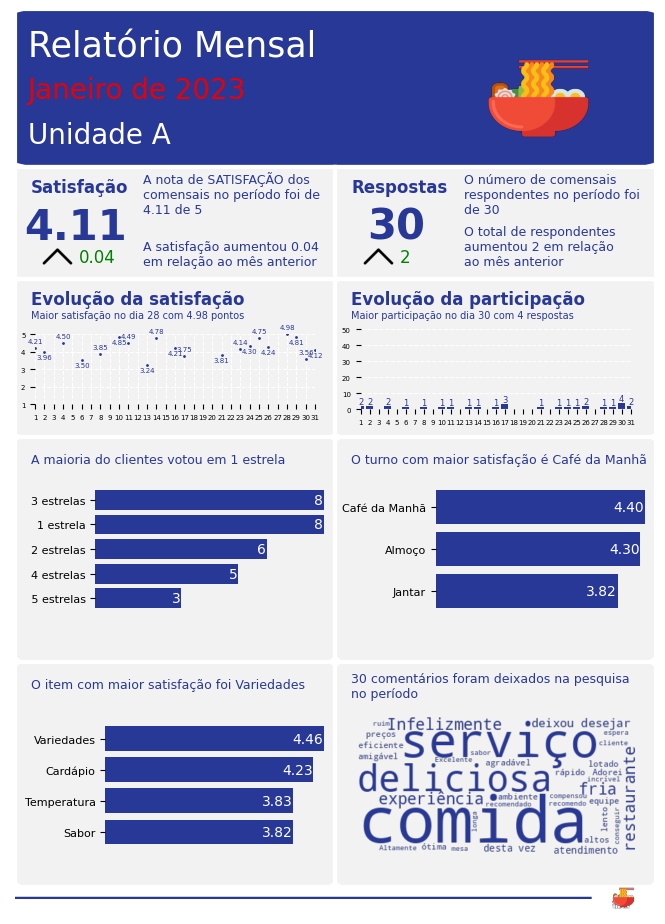

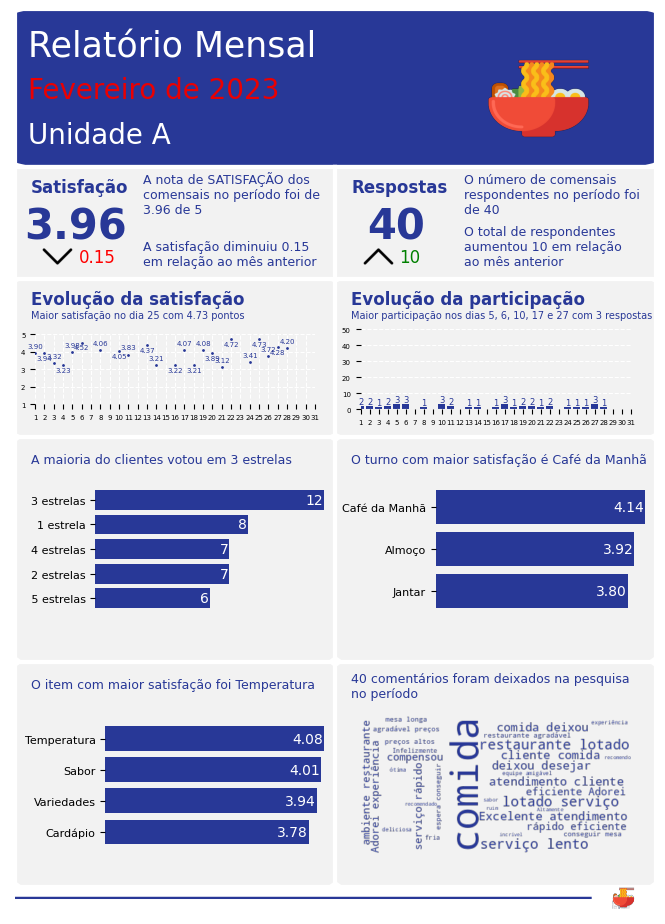

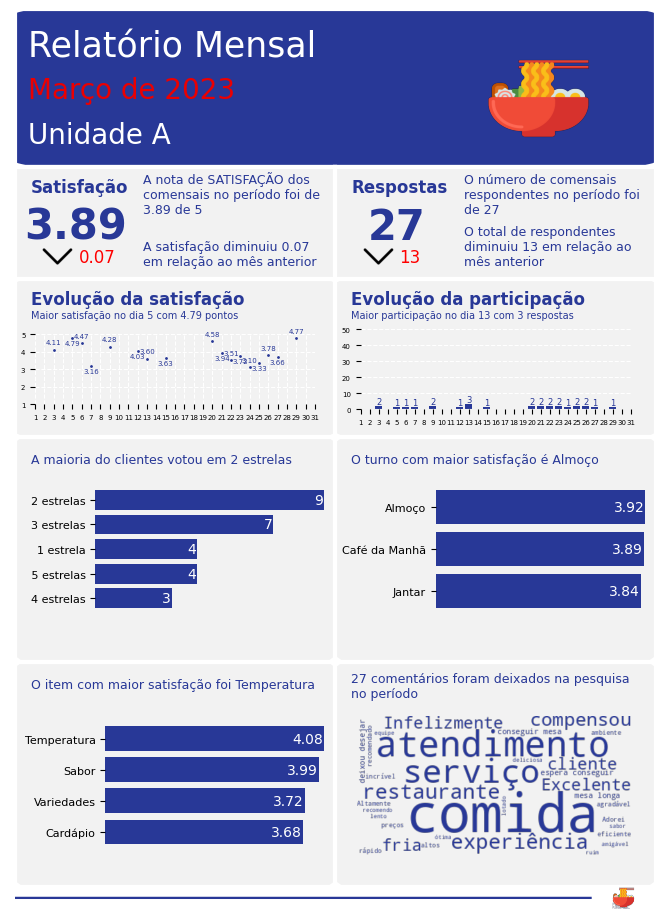

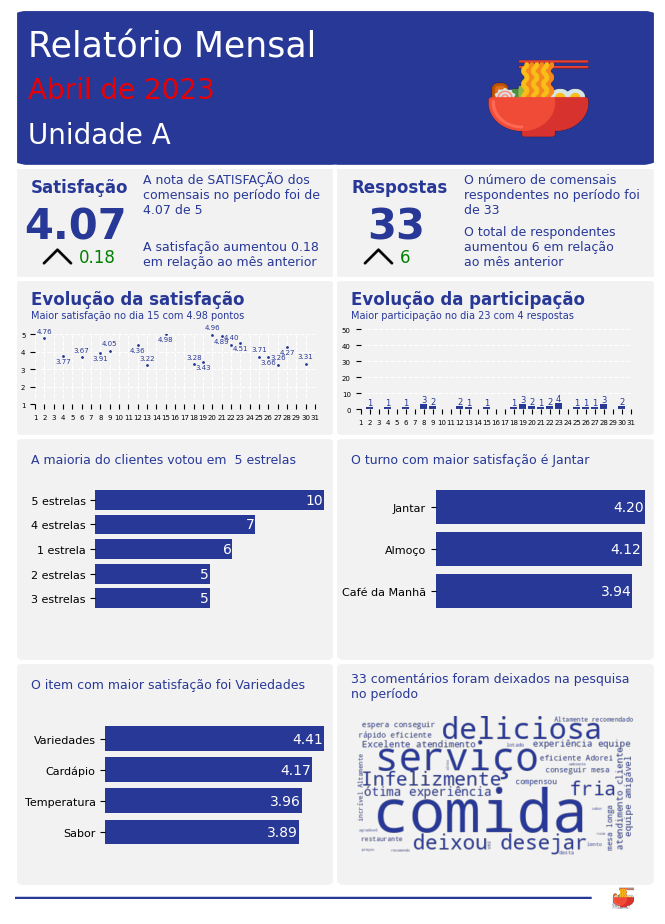

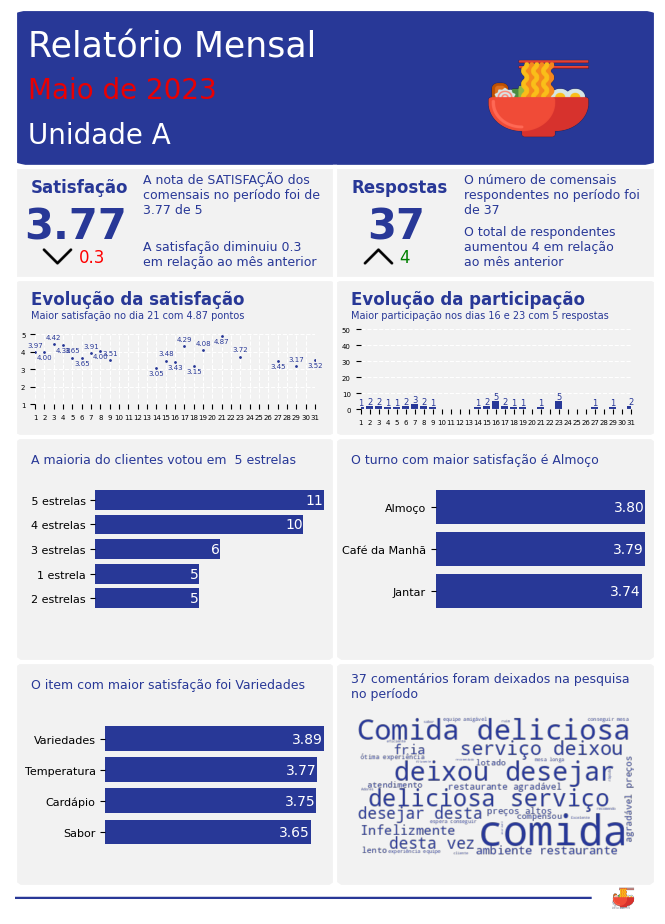

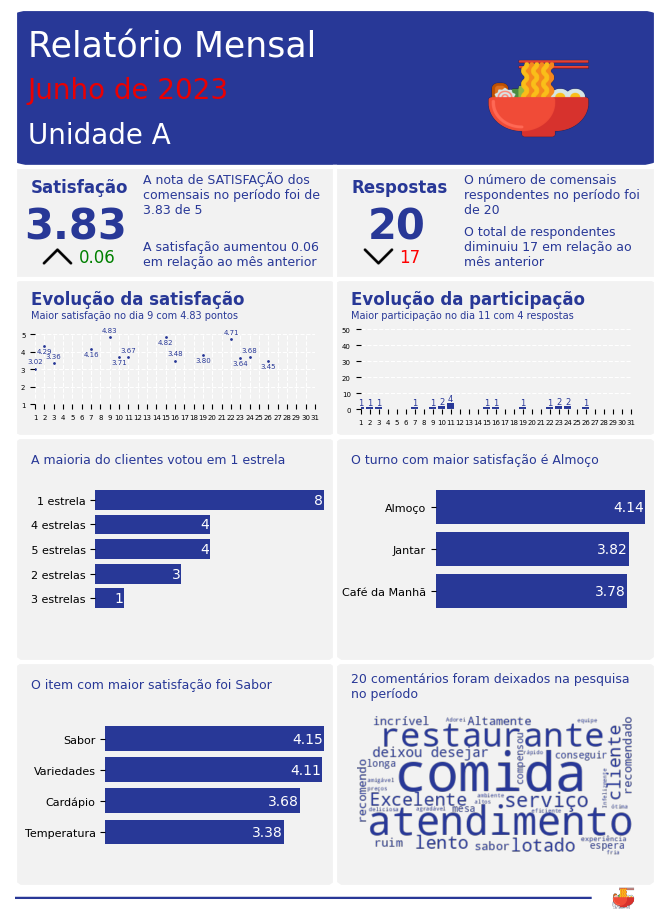

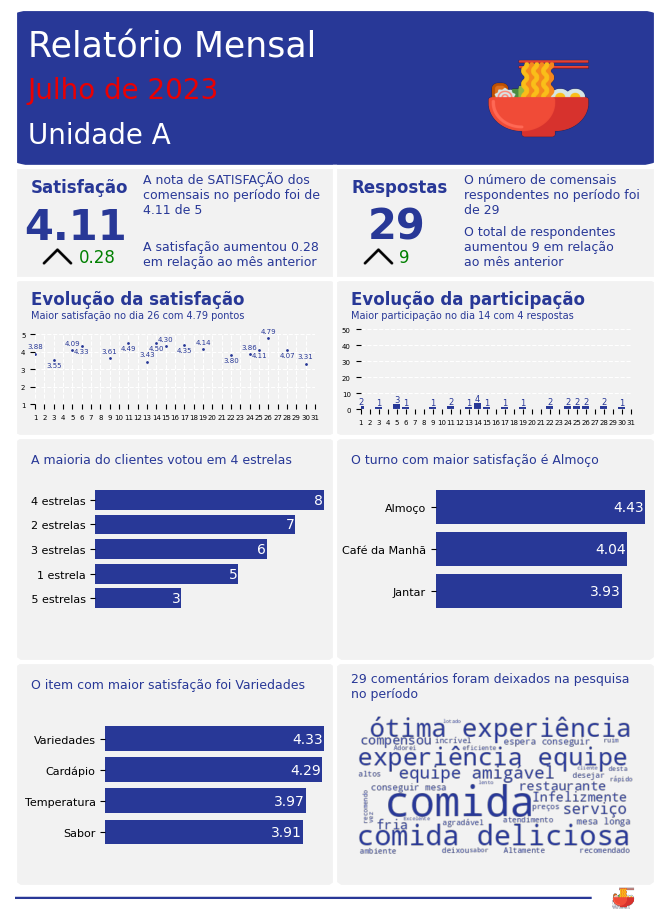

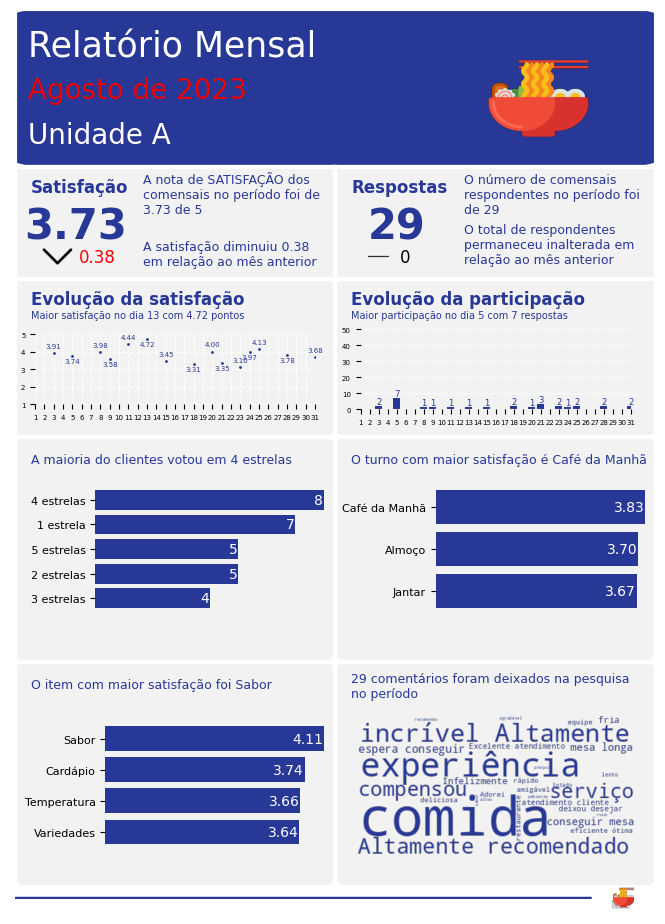

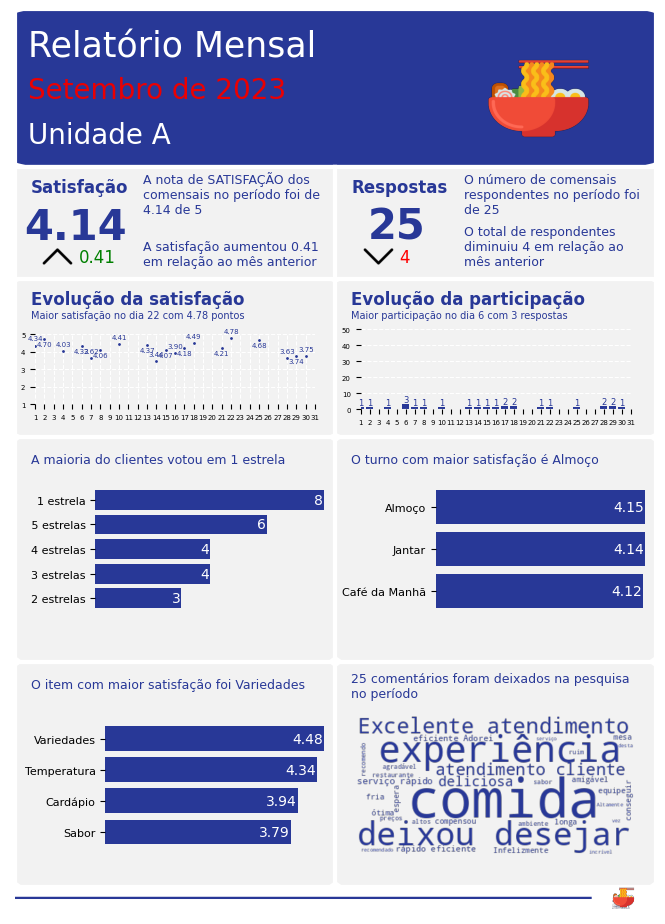

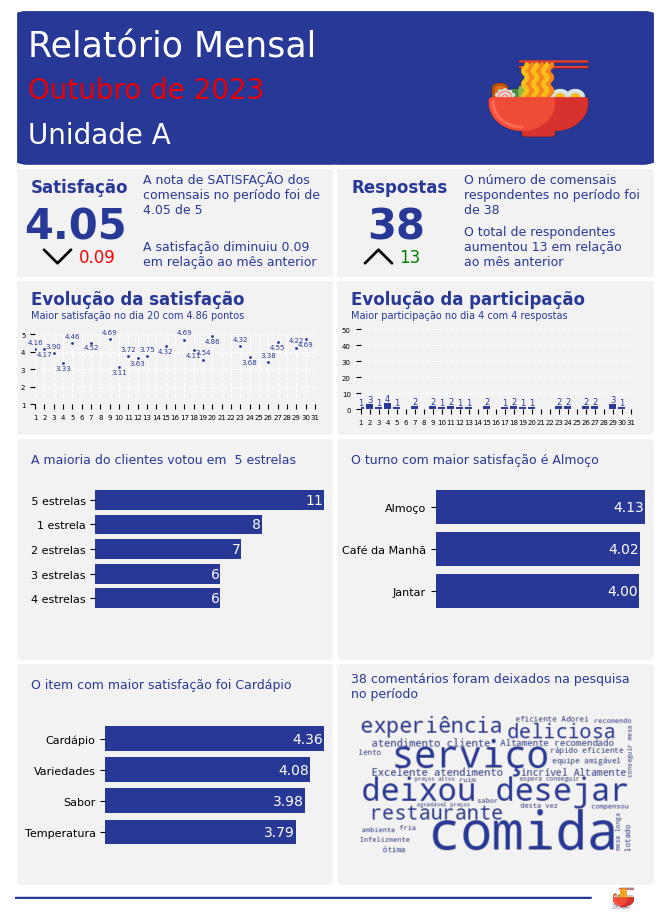

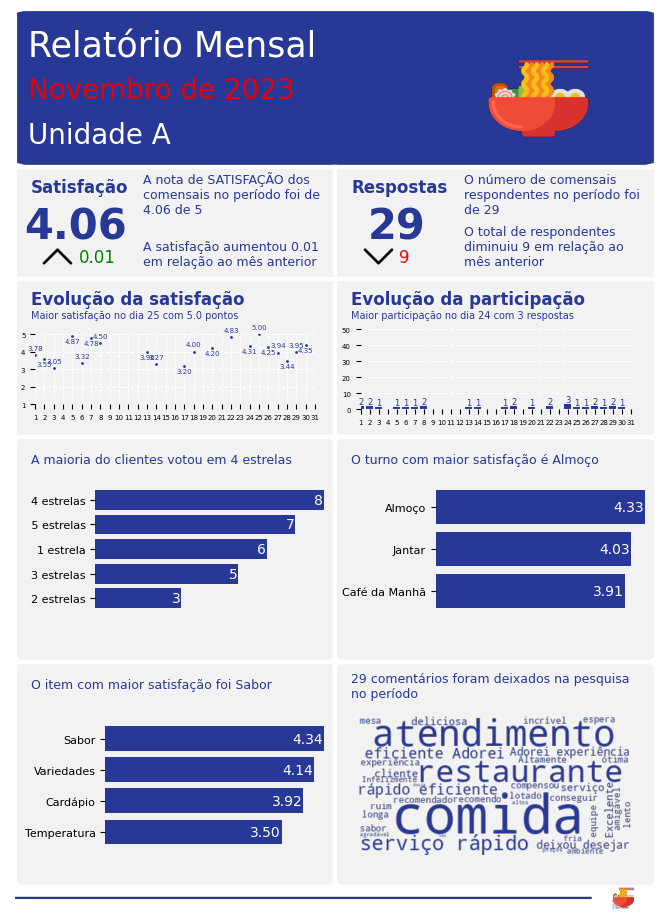

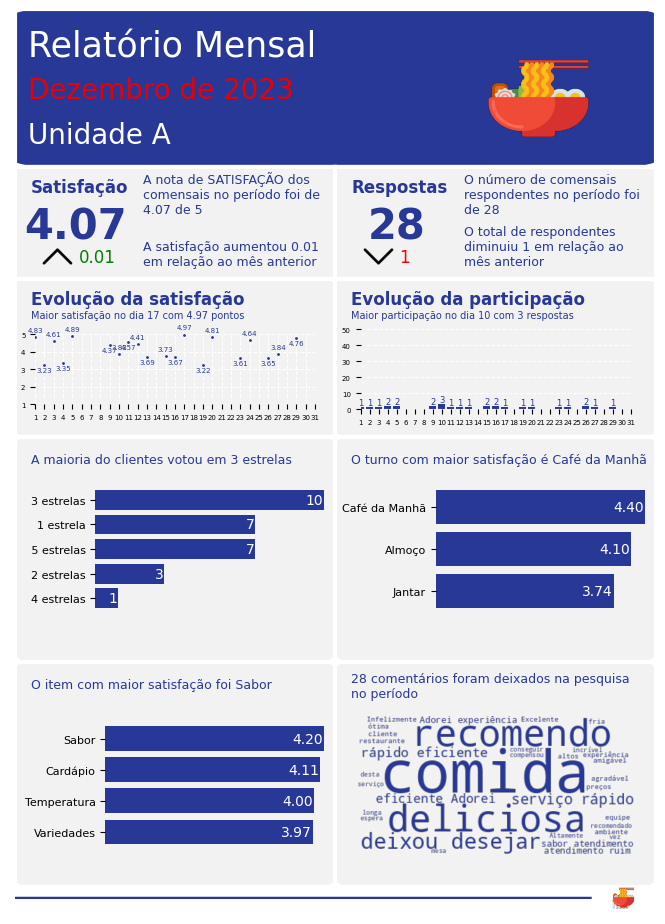

In [ ]:
# ordenandos os meses do ano para percorrer
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
meses = sorted(df['mes_text'].unique(), key=lambda x: ordem_meses.index(x))

for i, mes in enumerate(meses): # 'for' para percorrer todos os meses
  mes_atual = mes
  index_mes_anterior = (i - 1) % len(ordem_meses)
  mes_anterior = ordem_meses[index_mes_anterior]

  fig = plt.figure(figsize=(8.27, 11.69)) # fig tamanho A4
  gs0 = fig.add_gridspec(40, 30, wspace=0, hspace=0)

  # layout
  layout_bg_header = fig.add_subplot(gs0[:7, :30])
  layout_bg_header_titulo = fig.add_subplot(gs0[:3, :30])
  layout_bg_header_mes_ano = fig.add_subplot(gs0[3:5, :30])
  layout_bg_header_unidade = fig.add_subplot(gs0[5:7, :30])
  layout_bg_header_img = fig.add_subplot(gs0[2:6, 22:27])

  layout_satisfaction = fig.add_subplot(gs0[7:12, :15])
  layout_satisfaction_titulo = fig.add_subplot(gs0[7:8, :15])
  layout_satisfaction_sat = fig.add_subplot(gs0[8:10, 0:5])
  layout_satisfaction_sat_resumo = fig.add_subplot(gs0[8:12, 5:7])
  layout_satisfaction_sat_var = fig.add_subplot(gs0[10:12, 0:5])
  layout_satisfaction_sat_var_img = fig.add_subplot(gs0[10:12, 1:3])
  layout_satisfaction_sat_var_valor = fig.add_subplot(gs0[10:12, 3:6])
  layout_satisfaction_sat_var_resumo =  fig.add_subplot(gs0[11:12, 5:7])

  layout_ev_satisfaction = fig.add_subplot(gs0[12:19, :15])
  layout_ev_sat_text = fig.add_subplot(gs0[12:13, :15])
  layout_ev_graf = fig.add_subplot(gs0[13:19, :15])

  layout_responses = fig.add_subplot(gs0[7:12, 15:30])
  layout_responses_titulo = fig.add_subplot(gs0[7:8, 15:30])
  layout_responses_resp = fig.add_subplot(gs0[8:10, 20:30])
  layout_responses_resp_resumo = fig.add_subplot(gs0[8:12, 20:22])
  layout_responses_resp_var = fig.add_subplot(gs0[10:12, 15:20])
  layout_responses_resp_var_resumo =  fig.add_subplot(gs0[11:12, 20:22])
  layout_responses_resp_var_img = fig.add_subplot(gs0[10:12, 16:18])
  layout_responses_resp_var_valor = fig.add_subplot(gs0[10:12, 18:20])

  layout_ev_responses = fig.add_subplot(gs0[12:19, 15:30])
  layout_ev_responses_titulo = fig.add_subplot(gs0[12:13, 15:30])
  layout_ev_responses_graf = fig.add_subplot(gs0[13:19, 15:30])

  layout_detalhamento_sat = fig.add_subplot(gs0[19:29, :15])
  layout_detalhamento_sat_titulo = fig.add_subplot(gs0[19:20, :15])
  layout_detalhamento_sat_graf = fig.add_subplot(gs0[19:29, 1:15])

  layout_turnos = fig.add_subplot(gs0[19:29, 15:30])
  layout_turno_text = fig.add_subplot(gs0[19:20, 15:30])
  layout_turno_graf = fig.add_subplot(gs0[19:29, 19:30])

  layout_microfeedbacks = fig.add_subplot(gs0[29:39, :15])
  layout_microfeedbacks_text = fig.add_subplot(gs0[29:30, :15])
  layout_microfeedbacks_graf = fig.add_subplot(gs0[30:39, :15])

  layout_comentarios = fig.add_subplot(gs0[29:39, 15:30])
  layout_comentarios_text = fig.add_subplot(gs0[29:30, 15:30])
  layout_comentarios_graf = fig.add_subplot(gs0[30:39, 16:29])

  layout_footer = fig.add_subplot(gs0[39, :30])
  layout_footer_line = fig.add_subplot(gs0[39, :27])
  layout_footer_img = fig.add_subplot(gs0[39, 27:30])

  # layouts fundo
  layout_fundo = [
      layout_bg_header,
      layout_satisfaction,
      layout_ev_satisfaction,
      layout_responses,
      layout_ev_responses,
      layout_detalhamento_sat,
      layout_turnos,
      layout_microfeedbacks,
      layout_comentarios,
      layout_footer,
  ]

  # tratamento p/ layouts de fundo
  [spine.set_color('white') for layout in layout_fundo for spine in layout.spines.values()] # contorno branco
  [spine.set_linewidth(3.0) for layout in layout_fundo for spine in layout.spines.values()] # grossura contorno
  [tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
  [tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.yaxis.get_major_ticks()]
  [ax.tick_params(axis='both', color='none') for layout in layout_fundo for ax in [layout]] # s/ tracejado

  # layouts interno (gráficos, textos, imagens e bignumbers)
  layout_int = [
      layout_bg_header_titulo,
      layout_bg_header_mes_ano,
      layout_bg_header_unidade,
      layout_bg_header_img,

      layout_satisfaction_titulo,
      layout_satisfaction_sat,
      layout_satisfaction_sat_resumo,
      layout_satisfaction_sat_var,
      layout_satisfaction_sat_var_resumo,
      layout_satisfaction_sat_var_img,
      layout_satisfaction_sat_var_valor,

      layout_ev_sat_text,
      layout_ev_graf,

      layout_responses_titulo,
      layout_responses_resp,
      layout_responses_resp_resumo,
      layout_responses_resp_var,
      layout_responses_resp_var_resumo,
      layout_responses_resp_var_img,
      layout_responses_resp_var_valor,

      layout_ev_responses_titulo,
      layout_ev_responses_graf,

      layout_detalhamento_sat_titulo,
      layout_detalhamento_sat_graf,

      layout_turno_text,
      layout_turno_graf,

      layout_microfeedbacks_text,
      layout_microfeedbacks_graf,

      layout_comentarios_text,
      layout_comentarios_graf,

      layout_footer_line,
      layout_footer_img
  ]

  # tratamento p/ layouts internos
  [layout.set_facecolor('none') for layout in layout_int] # s/ preenchimento
  [layout.spines[:].set_visible(False) for layout in layout_int] # s/ contorno
  [tick.label1.set_visible(False) for layout in layout_int for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
  [tick.label1.set_visible(False) for layout in layout_int for tick in layout.yaxis.get_major_ticks()]
  [ax.tick_params(axis='both', color='none') for layout in layout_int for ax in [layout]] # s/ tracejado

  # -------------------------------------------------------
  # bg header background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#283897')
  layout_bg_header.add_patch(rect)

  # bg header texto
  layout_bg_header_titulo.text(0.02, 0.2, f'Relatório Mensal', ha='left', va='bottom', fontsize=25, color='white')

  mes = mes
  ano = 2023  # aqui é importanto automatizar para também percorrer pelos anos possíveis, considerando um possível banco de dados
  layout_bg_header_mes_ano.text(0.02, 0.4, f'{mes} de {ano}', ha='left', va='bottom', fontsize=20, color='#ea0002')

  unidade = 'Unidade A' # aqui é importante automatizar para percorrer por todas as unidades possíveis
  layout_bg_header_unidade.text(0.02, 0.4, f'{unidade}', ha='left', va='bottom', fontsize=20, color='white')

  # bg header img
  caminho_da_imagem = '/content/drive/MyDrive/img/ramen.png'
  imagem = mpimg.imread(caminho_da_imagem)
  img = layout_bg_header_img.imshow(imagem)

  nova_largura = imagem.shape[1] * 2
  nova_altura = imagem.shape[0] * 2
  img.set_extent([0, nova_largura, 0, nova_altura])

  layout_bg_header_img.set_aspect('auto')
  layout_bg_header_img.axis('off')

  # -------------------------------------------------------
  # satisfação background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_satisfaction.add_patch(rect)

  # satisfação texto
  sat_atual_text = '{:.2f}'.format(df[df['mes_text'] == mes_atual]['satisfacao'].mean())
  sat_atual = df[df['mes_text'] == mes_atual]['satisfacao'].mean()
  sat_ant = df[df['mes_text'] == mes_anterior]['satisfacao'].mean()
  sat_var = round(sat_atual - sat_ant, 2)

  layout_satisfaction_titulo.text(0.05, -0.3, 'Satisfação', ha='left', va='bottom', fontsize=12, fontweight='bold', color='#283897')
  layout_satisfaction_sat.text(0.09, -0.3, f'{sat_atual_text}', ha='left', va='bottom', fontsize=30, fontweight='bold', color='#283897')
  layout_satisfaction_sat_resumo.text(0.5, 0.7, f'A nota de SATISFAÇÃO dos\ncomensais no período foi de \n{sat_atual_text} de 5', ha='left', va='bottom', fontsize=9, color='#283897')

  if sat_var > 0:
    layout_satisfaction_sat_var_resumo.text(0.5, 0.5, f'A satisfação aumentou {sat_var} \nem relação ao mês anterior', ha='left', va='bottom', fontsize=9, color='#283897')
  elif sat_var < 0:
    layout_satisfaction_sat_var_resumo.text(0.5, 0.5, f'A satisfação diminuiu {abs(sat_var)} \nem relação ao mês anterior', ha='left', va='bottom', fontsize=9, color='#283897')
  else:
    layout_satisfaction_sat_var_resumo.text(0.5, 0.59, f'A satisfação permaneceu \ninalterada em relação ao mês \nanterior', ha='left', va='bottom', fontsize=9, color='#283897')

  # satisfação valor e img
  caminho_da_imagem_up = '/content/drive/MyDrive/img/up-arrow.png'
  caminho_da_imagem_down = '/content/drive/MyDrive/img/down-arrow.png'
  caminho_da_imagem_line = '/content/drive/MyDrive/img/minus.png'

  if sat_var > 0:
    layout_satisfaction_sat_var_valor.text(0, 0.3, abs(sat_var), ha='left', va='bottom', fontsize=12, color='green')
    imagem = mpimg.imread(caminho_da_imagem_up)
  elif sat_var < 0:
    layout_satisfaction_sat_var_valor.text(0, 0.3, abs(sat_var), ha='left', va='bottom', fontsize=12, color='red')
    imagem = mpimg.imread(caminho_da_imagem_down)
  else:
    layout_satisfaction_sat_var_valor.text(0, 0.3, abs(sat_var), ha='left', va='bottom', fontsize=12, color='black')
    imagem = mpimg.imread(caminho_da_imagem_line)

  img = layout_satisfaction_sat_var_img.imshow(imagem)
  nova_largura = imagem.shape[1]
  nova_altura = imagem.shape[0]
  img.set_extent([0, nova_largura, 0, nova_altura])
  layout_satisfaction_sat_var_img.axis('off')

  # -------------------------------------------------------
  # ev satisfação background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_ev_satisfaction.add_patch(rect)

  # ev satisfação texto
  media_satisfacao_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].mean().reset_index()

  max_sat = round(max(media_satisfacao_por_dia['satisfacao']),2)
  day_max_sat = round(media_satisfacao_por_dia.loc[media_satisfacao_por_dia['satisfacao'].idxmax()]['dia'])
  dias_com_max_satisfacao = media_satisfacao_por_dia[media_satisfacao_por_dia['satisfacao'] == max_sat]['dia']

  layout_ev_sat_text.text(0.05, -0.3, 'Evolução da satisfação', ha='left', va='bottom', fontsize=12, fontweight='bold', color='#283897')

  if len(dias_com_max_satisfacao) > 1:
    formatted_dias = ', '.join(map(str, dias_com_max_satisfacao.iloc[:-1])) + ' e ' + str(dias_com_max_satisfacao.iloc[-1])
    layout_ev_sat_text.text(0.05, -0.8, f'Maior satisfação nos dias {formatted_dias} com {max_sat} pontos', ha='left', va='bottom', fontsize=7, color='#283897')
  else:
    layout_ev_sat_text.text(0.05, -0.8, f'Maior satisfação no dia {day_max_sat} com {max_sat} pontos', ha='left', va='bottom', fontsize=7, color='#283897')

  # ev satisfação gráfico
  iax_width, iax_height = 2.8, 0.7
  iax = inset_axes(layout_ev_graf, width=iax_width, height=iax_height, borderpad=0, loc='center')
  media_satisfacao_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].mean().reset_index()
  iax.scatter(media_satisfacao_por_dia['dia'], media_satisfacao_por_dia['satisfacao'], s=1, color='#283897', zorder=2)
  iax.set_ylim(1, 5)
  iax.set_xlim(1, 31)
  iax.set_xticks(range(1, 32))
  iax.spines[:].set_visible(False)
  iax.tick_params(axis='both', which='both', labelsize=5)
  for i, txt in enumerate(media_satisfacao_por_dia['satisfacao']):
      offset = 0.3 if i % 2 == 0 else -0.4
      iax.text(media_satisfacao_por_dia['dia'].iloc[i], txt + offset, f'{txt:.2f}', ha='center', fontsize=5, color="#283897")
  iax.grid(ls='--', c='w', zorder=1)
  iax.set_facecolor('none')

  # -------------------------------------------------------
  # respostas background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_responses.add_patch(rect)

  # respostas texto
  resp_atual = df[df['mes_text'] == mes_atual]['satisfacao'].count()
  resp_ant = df[df['mes_text'] == mes_anterior]['satisfacao'].count()
  resp_var = resp_atual - resp_ant

  layout_responses_titulo.text(0.05, -0.3, 'Respostas', ha='left', va='bottom', fontsize=12, fontweight='bold', color='#283897')
  layout_responses_resp.text(-0.35, -0.3, f'{resp_atual}', ha='left', va='bottom', fontsize=30, fontweight='bold', color='#283897')
  layout_responses_resp_resumo.text(0.5, 0.7, f'O número de comensais \nrespondentes no período foi \nde {resp_atual}', ha='left', va='bottom', fontsize=9, color='#283897')

  if resp_var > 0:
    layout_responses_resp_var_resumo.text(0.5, 0.5, f'O total de respondentes \naumentou {resp_var} em relação \nao mês anterior', ha='left', va='bottom', fontsize=9, color='#283897')
  elif resp_var < 0:
    layout_responses_resp_var_resumo.text(0.5, 0.5, f'O total de respondentes \ndiminuiu {abs(resp_var)} em relação ao \nmês anterior', ha='left', va='bottom', fontsize=9, color='#283897')
  else:
    layout_responses_resp_var_resumo.text(0.5, 0.59, f'O total de respondentes \npermaneceu inalterada em \nrelação ao mês anterior', ha='left', va='bottom', fontsize=9, color='#283897')

  # respostas valor e img
  caminho_da_imagem_up = '/content/drive/MyDrive/img/up-arrow.png'
  caminho_da_imagem_down = '/content/drive/MyDrive/img/down-arrow.png'
  caminho_da_imagem_line = '/content/drive/MyDrive/img/minus.png'

  if resp_var > 0:
    layout_responses_resp_var_valor.text(0, 0.3, abs(resp_var), ha='left', va='bottom', fontsize=12, color='green')
    imagem = mpimg.imread(caminho_da_imagem_up)
  elif resp_var < 0:
    layout_responses_resp_var_valor.text(0, 0.3, abs(resp_var), ha='left', va='bottom', fontsize=12, color='red')
    imagem = mpimg.imread(caminho_da_imagem_down)
  else:
    layout_responses_resp_var_valor.text(0, 0.3, 0, ha='left', va='bottom', fontsize=12, color='black')
    imagem = mpimg.imread(caminho_da_imagem_line)

  img = layout_responses_resp_var_img.imshow(imagem)
  nova_largura = imagem.shape[1]
  nova_altura = imagem.shape[0]
  img.set_extent([0, nova_largura, 0, nova_altura])
  layout_responses_resp_var_img.axis('off')

  # -------------------------------------------------------
  # ev respostas background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_ev_responses.add_patch(rect)

  abs_resp_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].count().reset_index()

  # grafico
  bx_width, bx_height = 2.7, 0.8
  bx = inset_axes(layout_ev_responses_graf, width=bx_width, height=bx_height, borderpad=0, loc='center')
  bars = bx.bar(abs_resp_por_dia['dia'], abs_resp_por_dia['satisfacao'], color='#283897')
  bx.spines[:].set_visible(False)
  bx.set_xlim(1, 31)
  bx.set_xticks(range(1, 32))
  bx.tick_params(axis='x', labelsize=5)
  bx.set_yticks(range(0, 51, 10))
  bx.set_yticklabels([str(i) for i in range(0, 51, 10)])
  bx.tick_params(axis='y', labelsize=5)
  bx.set_facecolor('none')
  bx.grid(axis = 'y', ls='--', c='w')
  for bar in bars:
      height = bar.get_height()
      bx.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', color='#283897', fontsize=6)

  max_resp = round(max(abs_resp_por_dia['satisfacao']),2)
  day_max_resp = round(abs_resp_por_dia.loc[abs_resp_por_dia['satisfacao'].idxmax()]['dia'])
  dias_com_max_participacao = abs_resp_por_dia[abs_resp_por_dia['satisfacao'] == abs_resp_por_dia['satisfacao'].max()]['dia']

  # texto
  layout_ev_responses_titulo.text(0.05, -0.3, 'Evolução da participação', ha='left', va='bottom', fontsize=12, fontweight='bold', color='#283897')

  if len(dias_com_max_participacao) > 1:
    formatted_dias = ', '.join(map(str, dias_com_max_participacao.iloc[:-1])) + ' e ' + str(dias_com_max_participacao.iloc[-1])
    layout_ev_responses_titulo.text(0.05, -0.8, f'Maior participação nos dias {formatted_dias} com {max_resp} respostas', ha='left', va='bottom', fontsize=7, color='#283897')
  else:
    layout_ev_responses_titulo.text(0.05, -0.8, f'Maior participação no dia {day_max_resp} com {max_resp} respostas', ha='left', va='bottom', fontsize=7, color='#283897')

  # -------------------------------------------------------
  # turno background
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_turnos.add_patch(rect)

  # turno texto
  media_satisfacao_por_turno = df[df['mes_text'] == mes_atual].groupby('turno')['satisfacao'].mean().reset_index().sort_values(by='satisfacao', ascending=True)
  turno_max_sat = media_satisfacao_por_turno.loc[media_satisfacao_por_turno['satisfacao'].idxmax()]['turno']

  layout_turno_text.text(0.05, -0.3, f'O turno com maior satisfação é {turno_max_sat}', ha='left', va='bottom', fontsize=9, color='#283897')

  # turno gráfico
  bx_width, bx_height = 2.2, 1.3
  bx = inset_axes(layout_turno_graf, width=bx_width, height=bx_height, borderpad=0, loc='right')
  bars = bx.barh(media_satisfacao_por_turno['turno'], media_satisfacao_por_turno['satisfacao'], color='#283897')
  bx.spines[:].set_visible(False)
  bx.set_xticks([])
  bx.set_facecolor('none')
  bx.tick_params(axis='y', labelsize=8)
  for bar in bars:
      width = bar.get_width()
      height = bar.get_height()
      plt.text(width - 0.02, bar.get_y() + height / 2, f'{width:.2f}', ha='right', va='center', color='white')

  # -------------------------------------------------------
  # detalhamento sat backgound
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_detalhamento_sat.add_patch(rect)

  abs_estrelas = df[df['mes_text'] == mes_atual]['estrelas'].value_counts().reset_index().rename(columns={'index': 'estrelas', 'estrelas': 'contagem'})
  abs_estrelas = abs_estrelas.sort_values(by='contagem', ascending=True)
  max_estrelas = abs_estrelas.loc[abs_estrelas['contagem'].idxmax()]['estrelas']

  # detalhamento sat texto
  layout_detalhamento_sat_titulo.text(0.05, -0.3, f'A maioria do clientes votou em {max_estrelas}', ha='left', va='bottom', fontsize=9, color='#283897')

  # detalhamento sat grafico
  bx_width, bx_height = 2.4, 1.3
  bx = inset_axes(layout_detalhamento_sat_graf, width=bx_width, height=bx_height, borderpad=0, loc='right')
  bars = bx.barh(abs_estrelas['estrelas'], abs_estrelas['contagem'], color='#283897')
  bx.spines[:].set_visible(False)
  bx.set_xticks([])
  bx.set_facecolor('none')
  bx.tick_params(axis='y', labelsize=8)
  for bar in bars:
      width = bar.get_width()
      height = bar.get_height()
      plt.text(width - 0.02, bar.get_y() + height / 2, f'{width:.0f}', ha='right', va='center', color='white')

  # -------------------------------------------------------
  # microfeedbacks backgound
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_microfeedbacks.add_patch(rect)

  abs_microfeedbacks = df[df['mes_text'] == mes_atual].groupby('microfeedbacks')['satisfacao'].mean().reset_index().sort_values(by='satisfacao', ascending=True)
  max_microfeedbacks = abs_microfeedbacks.loc[abs_microfeedbacks['satisfacao'].idxmax()]['microfeedbacks']

  # microfeedbacks sat texto
  layout_microfeedbacks_text.text(0.05, -0.3, f'O item com maior satisfação foi {max_microfeedbacks}', ha='left', va='bottom', fontsize=9, color='#283897')

  # microfeedbacks sat grafico
  bx_width, bx_height = 2.3, 1.3
  bx = inset_axes(layout_microfeedbacks_graf, width=bx_width, height=bx_height, borderpad=0, loc='right')
  bars = bx.barh(abs_microfeedbacks['microfeedbacks'], abs_microfeedbacks['satisfacao'], color='#283897')
  bx.spines[:].set_visible(False)
  bx.set_xticks([])
  bx.set_facecolor('none')
  bx.tick_params(axis='y', labelsize=8)
  for bar in bars:
      width = bar.get_width()
      height = bar.get_height()
      plt.text(width - 0.02, bar.get_y() + height / 2, f'{width:.2f}', ha='right', va='center', color='white')

  # -------------------------------------------------------
  # comentários backgound
  width_rect, height_rect = 0.78, 0.78
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0.13
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f2f2f2', clip_on=True)
  layout_comentarios.add_patch(rect)

  abs_comentarios = df[df['mes_text'] == mes_atual]['comentarios'].count()

  # comentários texto
  layout_comentarios_text.text(0.05, -0.7, f'{abs_comentarios} comentários foram deixados na pesquisa \nno período', ha='left', va='bottom', fontsize=9, color='#283897')

  #comentários img
  text = " ".join(df[df['mes_text'] == mes_atual]['comentarios'])
  stop_words = set(stopwords.words('portuguese'))
  filtered_text = " ".join(word for word in text.split() if word.lower() not in stop_words)

  color_func = lambda *args, **kwargs: '#283897'
  wordcloud = WordCloud(width=800, height=400, background_color=None, mode='RGBA', color_func=color_func, scale=0.5).generate(filtered_text)

  img = layout_footer_img.imshow(wordcloud, interpolation='bilinear')
  layout_comentarios_graf.imshow(wordcloud, interpolation='bilinear')
  layout_comentarios_graf.axis('off')

  # -------------------------------------------------------
  # rodapé linha
  width_rect, height_rect = 1, 0.1
  x_rect = (1 - width_rect) / 2
  y_rect = (1 - height_rect) / 2
  roundness = 0
  rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=0.5, edgecolor='none', facecolor='#283897', clip_on=True)
  layout_footer_line.add_patch(rect)

  # rodapé imagem
  caminho_da_imagem = '/content/drive/MyDrive/img/ramen.png'
  imagem = mpimg.imread(caminho_da_imagem)
  img = layout_footer_img.imshow(imagem)
  nova_largura = imagem.shape[1]
  nova_altura = imagem.shape[0]
  img.set_extent([0, nova_largura, 0, nova_altura])
  layout_footer_img.axis('off')

  #plt.savefig(f'/content/drive/MyDrive/reports/Relatorio_{mes}_de_{ano}.pdf', bbox_inches='tight')
  plt.show()

## 💻 Números anuais de uma consultoria de T.I.:


[Report de exemplo](https://slidemodel.com/templates/one-pager-annual-report-powerpoint-template/)

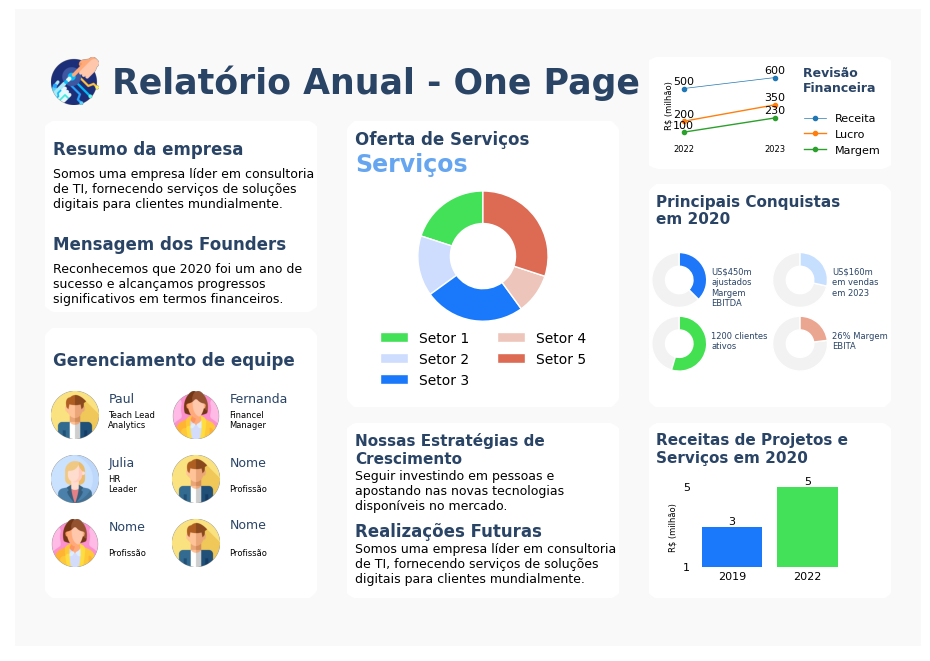

In [ ]:
fig = plt.figure(figsize=(11.69, 8.27)) # fig tamanho A4
gs0 = fig.add_gridspec(40, 30, wspace=0, hspace=0)

# fundo --------------
ax = fig.add_subplot(gs0[:, :])

[spine.set_color('none') for spine in ax.spines.values()]
[tick.label1.set_visible(False) for tick in ax.xaxis.get_major_ticks()]
[tick.label1.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
ax.tick_params(axis='both', color='none')

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.4
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#f9f9f9')
ax.add_patch(rect)


# layout --------------
layout_titulo = fig.add_subplot(gs0[3:6, :17])
#layout_titulo_img_fundo = fig.add_subplot(gs0[3:6, 1:3])
layout_titulo_img = fig.add_subplot(gs0[3:6, 1:3])

layout_resumo = fig.add_subplot(gs0[7:19, 1:10])
layout_resumo_fist_titulo = fig.add_subplot(gs0[7:9, 1:10])
layout_resumo_fist_texto = fig.add_subplot(gs0[9:13, 1:10])
layout_resumo_secnd_titulo = fig.add_subplot(gs0[13:15, 1:10])
layout_resumo_secnd_texto = fig.add_subplot(gs0[15:19, 1:10])

layout_people = fig.add_subplot(gs0[20:37, 1:10])
layout_people_titulo = fig.add_subplot(gs0[21:23, 1:10])

layout_people_one = fig.add_subplot(gs0[24:27, 1:3])
layout_people_one_name = fig.add_subplot(gs0[24:25, 3:6])
layout_people_one_text = fig.add_subplot(gs0[25:27, 3:6])

layout_people_two = fig.add_subplot(gs0[28:31, 1:3])
layout_people_two_name = fig.add_subplot(gs0[28:29, 3:6])
layout_people_two_text = fig.add_subplot(gs0[29:31, 3:6])

layout_people_three = fig.add_subplot(gs0[32:35, 1:3])
layout_people_three_name = fig.add_subplot(gs0[32:33, 3:6])
layout_people_three_text = fig.add_subplot(gs0[33:35, 3:6])

layout_people_four = fig.add_subplot(gs0[24:27, 5:7])
layout_people_four_name = fig.add_subplot(gs0[24:25, 7:10])
layout_people_four_text = fig.add_subplot(gs0[25:27, 7:10])

layout_people_five = fig.add_subplot(gs0[28:31, 5:7])
layout_people_five_name = fig.add_subplot(gs0[28:29, 7:10])
layout_people_five_text = fig.add_subplot(gs0[29:31, 7:10])

layout_people_six = fig.add_subplot(gs0[32:35, 5:7])
layout_people_six_name = fig.add_subplot(gs0[31:33, 7:10])
layout_people_six_text = fig.add_subplot(gs0[33:35, 7:10])

layout_graf_one = fig.add_subplot(gs0[7:25, 11:20])
layout_graf_one_titulo = fig.add_subplot(gs0[7:9, 11:20])
layout_graf_one_sub_titulo = fig.add_subplot(gs0[9:11, 11:20])
layout_graf_one_graf = fig.add_subplot(gs0[11:20, 12:19])

layout_comentarios = fig.add_subplot(gs0[26:37, 11:20])
layout_comentarios_fist_titulo = fig.add_subplot(gs0[26:28, 11:20])
layout_comentarios_fist_texto = fig.add_subplot(gs0[28:32, 11:20])
layout_comentarios_secnd_titulo = fig.add_subplot(gs0[31:33, 11:20])
layout_comentarios_secnd_texto = fig.add_subplot(gs0[33:37, 11:20])

layout_financas = fig.add_subplot(gs0[3:10, 21:29])
layout_financas_graf = fig.add_subplot(gs0[5:7, 22:29])
layout_financas_titulo = fig.add_subplot(gs0[3:5, 26:29])

layout_key = fig.add_subplot(gs0[11:25, 21:29])
layout_key_titulo = fig.add_subplot(gs0[11:13, 21:29])

layout_key_graf_one = fig.add_subplot(gs0[15:19, 21:23])
layout_key_graf_one_text = fig.add_subplot(gs0[15:19, 23:25])

layout_key_graf_two = fig.add_subplot(gs0[19:23, 21:23])
layout_key_graf_two_text = fig.add_subplot(gs0[19:23, 23:25])

layout_key_graf_three = fig.add_subplot(gs0[15:19, 25:27])
layout_key_graf_three_text = fig.add_subplot(gs0[15:19, 27:29])

layout_key_graf_four = fig.add_subplot(gs0[19:23, 25:27])
layout_key_graf_four_text = fig.add_subplot(gs0[19:23, 27:29])

layout_revenues = fig.add_subplot(gs0[26:37, 21:29])
layout_revenues_titulo = fig.add_subplot(gs0[26:28, 21:29])
layout_revenues_graf = fig.add_subplot(gs0[28:35, 21:29])


# tratamento p/ layouts de fundo
layout_fundo = [
    layout_resumo,
    layout_people,
    layout_graf_one,
    layout_comentarios,
    layout_financas,
    layout_key,
    layout_revenues,
]

[spine.set_color('none') for layout in layout_fundo for spine in layout.spines.values()] # sem contorno
[layout.set_facecolor('none') for layout in layout_fundo] # fundo sem cor
#[spine.set_linewidth(3.0) for layout in layout_fundo for spine in layout.spines.values()] # grossura contorno
[tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
[tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.yaxis.get_major_ticks()]
[ax.tick_params(axis='both', color='none') for layout in layout_fundo for ax in [layout]] # s/ tracejado

# tratamento p/ layouts internos
layout_int = [
    #layout_titulo_img_fundo,
    layout_titulo_img,

    layout_titulo,
    layout_resumo_fist_titulo,
    layout_resumo_fist_texto,
    layout_resumo_secnd_titulo,
    layout_resumo_secnd_texto,

    layout_people_titulo,
    layout_people_titulo,

    layout_people_one,
    layout_people_one_name,
    layout_people_one_text,

    layout_people_two,
    layout_people_two_name,
    layout_people_two_text,

    layout_people_three,
    layout_people_three_name,
    layout_people_three_text,

    layout_people_four_name,
    layout_people_four_text,

    layout_people_five,
    layout_people_five_name,
    layout_people_five_text,

    layout_people_six,
    layout_people_six_name,
    layout_people_six_text,

    layout_graf_one_titulo,
    layout_graf_one_sub_titulo,
    layout_graf_one_graf,

    layout_comentarios_fist_titulo,
    layout_comentarios_fist_texto,
    layout_comentarios_secnd_titulo,
    layout_comentarios_secnd_texto,

    layout_financas_graf,
    layout_financas_titulo,

    layout_key_titulo,

    layout_key_graf_one,
    layout_key_graf_one_text,

    layout_key_graf_two,
    layout_key_graf_two_text,

    layout_key_graf_three,
    layout_key_graf_three_text,

    layout_key_graf_four,
    layout_key_graf_four_text,

    layout_revenues_titulo,
    layout_revenues_graf,

]

[layout.set_facecolor('none') for layout in layout_int] # s/ preenchimento
[layout.spines[:].set_visible(False) for layout in layout_int] # s/ contorno
[tick.label1.set_visible(False) for layout in layout_int for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
[tick.label1.set_visible(False) for layout in layout_int for tick in layout.yaxis.get_major_ticks()]
[ax.tick_params(axis='both', color='none') for layout in layout_int for ax in [layout]] # s/ tracejado

# título --------------
caminho_da_imagem_logo = '/content/drive/MyDrive/img/robotic-hand.png'
imagem = mpimg.imread(caminho_da_imagem_logo)
img = layout_titulo_img.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_titulo_img.axis('off')

#width_rect, height_rect = 0.78, 0.78
#x_rect = (1 - width_rect) / 2
#y_rect = (1 - height_rect) / 2
#roundness = 0
#rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
#                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#EBEBEB')
#layout_titulo.add_patch(rect)

layout_titulo.text(0.19, 0.1, f'Relatório Anual - One Page', ha='left', va='bottom', fontsize=25, color='#2a4466', fontweight='bold')

# resumo --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_resumo.add_patch(rect)

layout_resumo_fist_titulo.text(0.03, 0.4, f'Resumo da empresa', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_resumo_fist_texto.text(0.03, 0.1, f'Somos uma empresa líder em consultoria \nde TI, fornecendo serviços de soluções \ndigitais para clientes mundialmente.', ha='left', va='bottom', fontsize=9, color='black')

layout_resumo_secnd_titulo.text(0.03, 0.4, f'Mensagem dos Founders', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_resumo_secnd_texto.text(0.03, 0.1, f'Reconhecemos que 2020 foi um ano de \nsucesso e alcançamos progressos \nsignificativos em termos financeiros.', ha='left', va='bottom', fontsize=9, color='black')

# people --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_people.add_patch(rect)

layout_people_titulo.text(0.03, 0.2, f'Gerenciamento de equipe', ha='left', va='bottom', fontsize=12, color='#2a4466', fontweight='bold')
layout_people_one_name.text(0.035, 0.1, f'Paul', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_one_text.text(0.03, 0.3, f'Teach Lead\nAnalytics', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_one.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_one.axis('off')

layout_people_two_name.text(0.035, 0.1, f'Julia', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_two_text.text(0.03, 0.3, f'HR\nLeader', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_two = '/content/drive/MyDrive/img/woman.png'
imagem = mpimg.imread(caminho_da_imagem_people_two)
img = layout_people_two.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_two.axis('off')

layout_people_three_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_three_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_two = '/content/drive/MyDrive/img/woman_four.png'
imagem = mpimg.imread(caminho_da_imagem_people_two)
img = layout_people_three.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_three.axis('off')

layout_people_four_name.text(0.035, 0.1, f'Fernanda', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_four_text.text(0.03, 0.3, f'Financel\nManager', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_four = '/content/drive/MyDrive/img/woman_four.png'
imagem = mpimg.imread(caminho_da_imagem_people_four)
img = layout_people_four.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_four.axis('off')

layout_people_five_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_five_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_five.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_five.axis('off')

layout_people_six_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_six_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_six.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_six.axis('off')

# serviços --------------
layout_graf_one_titulo.text(0.03, 0.7, f'Oferta de Serviços', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_graf_one_sub_titulo.text(0.03, 1, f'Serviços', ha='left', va='top', fontsize=17, color='#66a6f0', fontweight='bold')

valores = [20, 15, 25, 10, 30]
cores = ['#42e157', '#ceddfe', '#1a79fb', '#eec5ba', '#dd6b53']
rótulos = ['Setor 1', 'Setor 2', 'Setor 3', 'Setor 4', 'Setor 5']

layout_graf_one_graf.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_graf_one_graf.axis('equal')
layout_graf_one_graf.legend(rótulos, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2, frameon = False)

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_graf_one.add_patch(rect)

# comentarios --------------
layout_comentarios_fist_titulo.text(0.03, 0.7, f'Nossas Estratégias de \nCrescimento', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')
layout_comentarios_fist_texto.text(0.03, 0.1, f'Seguir investindo em pessoas e \napostando nas novas tecnologias \ndisponíveis no mercado.', ha='left', va='bottom', fontsize=9, color='black')

layout_comentarios_secnd_titulo.text(0.03, 0.4, f'Realizações Futuras', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_comentarios_secnd_texto.text(0.03, 0.2, f'Somos uma empresa líder em consultoria \nde TI, fornecendo serviços de soluções \ndigitais para clientes mundialmente.', ha='left', va='bottom', fontsize=9, color='black')

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_comentarios.add_patch(rect)

# finanças --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_financas.add_patch(rect)

anos = [2022, 2023]
receita = [500, 600]
lucro_liquido = [200, 350]
margem_liquida = [100, 230]
rotulos = ['Receita', 'Lucro', 'Margem']

bx_width, bx_height = 1, 0.6
bx = inset_axes(layout_financas_graf, width=bx_width, height=bx_height, borderpad=0, loc='center left')
bx.plot(anos, receita, marker='o', label='Receita', lw=0.5, markersize=3)
bx.plot(anos, lucro_liquido, marker='o', label='Lucro Líquido', lw=1, markersize=3)
bx.plot(anos, margem_liquida, marker='o', label='Margem Líquida', lw=1, markersize=3)

for i, txt in enumerate(receita):
    bx.text(anos[i], receita[i] + 20, f'{receita[i]}', ha='center', va='bottom', fontsize=8)

for i, txt in enumerate(lucro_liquido):
    bx.text(anos[i], lucro_liquido[i] + 20, f'{lucro_liquido[i]}', ha='center', va='bottom', fontsize=8)

for i, txt in enumerate(margem_liquida):
    bx.text(anos[i], margem_liquida[i] + 20, f'{margem_liquida[i]}', ha='center', va='bottom', fontsize=8)

#percentuais_receita = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(receita[1:], receita[:-1])]
#percentuais_lucro = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(lucro_liquido[1:], lucro_liquido[:-1])]
#percentuais_margem = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(margem_liquida[1:], margem_liquida[:-1])]

#for i, txt in enumerate(receita[1:]):
#    bx.text(anos[i + 1], receita[i + 1] - 20, f' +{percentuais_receita[i]}%', ha='center', va='top', color='gray', fontsize=8)

#for i, txt in enumerate(lucro_liquido[1:]):
#    bx.text(anos[i + 1], lucro_liquido[i + 1] - 20, f' +{percentuais_lucro[i]}%', ha='center', va='top', color='gray', fontsize=8)

#for i, txt in enumerate(margem_liquida[1:]):
#    bx.text(anos[i + 1], margem_liquida[i + 1] - 20, f' +{percentuais_margem[i]}%', ha='center', va='top', color='gray', fontsize=8)

#x.xlabel('Ano')

bx.legend(rotulos, loc='lower left', bbox_to_anchor=(1.15, -0.5), ncol=1, frameon = False, fontsize=8)
plt.ylabel('R$ (milhão)', fontsize=6)
plt.xticks(anos, fontsize=6)
plt.yticks([])
plt.tick_params(axis='both', color='none')
plt.gca().spines[:].set_visible(False)

layout_financas_titulo.text(0.03, 0.7, f'Revisão \nFinanceira', ha='left', va='top', fontsize=9, color='#2a4466', fontweight='bold')
# key --------------

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_key.add_patch(rect)

layout_key_titulo.text(0.03, 0.7, f'Principais Conquistas\nem 2020', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')

valores = [100, 60]
cores = ['#f2f2f2', '#1e77f8']
layout_key_graf_one.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_one.axis('equal')

layout_key_graf_one_text.text(0.03, 0.7, f'US$450m\najustados\nMargem\nEBITDA', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 40]
cores = ['#f2f2f2', '#c7dfff']
layout_key_graf_three.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_three.axis('equal')

layout_key_graf_three_text.text(0.03, 0.7, f'US$160m\nem vendas\nem 2023', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 120]
cores = ['#f2f2f2', '#43e052']
layout_key_graf_two.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_two.axis('equal')

layout_key_graf_two_text.text(0.03, 0.7, f'1200 clientes\nativos', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 30]
cores = ['#f2f2f2', '#eba692']
layout_key_graf_four.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_four.axis('equal')

layout_key_graf_four_text.text(0.03, 0.7, f'26% Margem\nEBITA', ha='left', va='top', fontsize=6, color='#2a4466')
# revenues --------------

layout_revenues_titulo.text(0.03, 0.7, f'Receitas de Projetos e\nServiços em 2020', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_revenues.add_patch(rect)

cores = ['#1a78fa', '#43e059']
ano = ['2019', '2022']
valores = [3, 5]

bx_width, bx_height = 1.5, 0.8
bx = inset_axes(layout_revenues_graf, width=bx_width, height=bx_height, borderpad=0, loc='lower center')
barras = bx.bar(ano, valores, color=cores, edgecolor='none')
for barra in barras:
    altura = barra.get_height()
    bx.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura}', ha='center', va='bottom', fontsize=8)

bx.tick_params(axis='both', which='both', length=0, labelsize=8)
bx.set_yticks([1, 5])
plt.ylabel('R$ (milhão)', fontsize=6)
plt.ylim(1, 5)
bx.spines[:].set_visible(False)


## ---



🔗`links de referência:`

`construção de layout:`

- [GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
- [Localização de uma subparcela em um GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.SubplotSpec.html#matplotlib.gridspec.SubplotSpec)


`gráficos e imagens:`
- [Caixa com dimensões especificadas](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html)
- [Eixos inseridos com uma determinada largura e altura](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.inset_axes.html)
- [Imagem anexada a um eixo](https://matplotlib.org/stable/api/image_api.html)

`config pdf:`
- [Gerar e salvar arquivo PDF](https://matplotlib.org/stable/api/backend_pdf_api.html#matplotlib.backends.backend_pdf.PdfPages.savefig)

`outras referências:`

- [Classe Matplotlib.gridspec.GridSpec em Python - Acervo Lima](https://acervolima.com/classe-matplotlib-gridspec-gridspec-em-python/ )
- [Distribuição de gráficos em um layout](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py)

`mandrill:`

- [Integração com API do Mandrill para envio de emails](https://www.google.com/search?q=conectar+a+api+do+mandrill&rlz=1C1GCCU_pt-BR&oq=conectar+a+api+do+mandrill&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIKCAEQABiABBiiBDIKCAIQABiABBiiBNIBCDY5NTlqMGo5qAIAsAIA&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:c8e58ef4,vid:NtvHhn4g8lk,st:0)

- [Integração do Mandrill](https://www.kommo.com/br/integracoes/mandrill/#:~:text=Para%20isso%2C%20voc%C3%AA%20precisar%C3%A1%20acessar,ou%20continuar%20usando%20a%20antiga.)